# Imports 

In [4]:
# Data Processing
import pandas as pd

# ML Tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# ML Algorithm
from sklearn.linear_model import LogisticRegression

# ML Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import precision_recall_fscore_support

# Visualizations
from matplotlib import pyplot as plt

# Saves the Model
import pickle

In [5]:
df = pd.read_csv(r'C:/Users/Jake/Desktop/Notebooks/EPL Prediction Model/Data/Encoded_EPL_DataWithTime.csv')

# Had this column get created upon loading, just dropped it
df = df.drop(columns=["Unnamed: 0"]) 
df

,Season,Season Encoding,Date,YearOfSeason,Time,Time Encoding,HomeTeam,HomeTeam Encoding,AwayTeam,AwayTeam Encoding,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Fall,0,12/09/2020,2020/21,Afternoon,0,Fulham,8,Arsenal,0,...,2.0,6.0,12.0,12.0,2.0,3.0,2.0,2.0,0.0,0.0
1,Fall,0,12/09/2020,2020/21,Late-Day,2,Crystal Palace,6,Southampton,21,...,3.0,5.0,14.0,11.0,7.0,3.0,2.0,1.0,0.0,0.0
2,Fall,0,12/09/2020,2020/21,Late-Day,2,Liverpool,13,Leeds,11,...,6.0,3.0,9.0,6.0,9.0,0.0,1.0,0.0,0.0,0.0
3,Fall,0,12/09/2020,2020/21,Late-Day,2,West Ham,28,Newcastle,17,...,3.0,2.0,13.0,7.0,8.0,7.0,2.0,2.0,0.0,0.0
4,Fall,0,13/09/2020,2020/21,Mid-Day,1,West Brom,27,Leicester,12,...,1.0,7.0,12.0,9.0,2.0,5.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Summer,3,26/07/2020,2019/20,Mid-Day,1,Leicester,12,Man United,15,...,3.0,3.0,12.0,11.0,3.0,3.0,1.0,4.0,1.0,0.0
756,Summer,3,26/07/2020,2019/20,Mid-Day,1,Man City,14,Norwich,18,...,10.0,4.0,7.0,4.0,9.0,0.0,1.0,1.0,0.0,0.0
757,Summer,3,26/07/2020,2019/20,Mid-Day,1,Newcastle,17,Liverpool,13,...,2.0,6.0,11.0,5.0,2.0,4.0,1.0,0.0,0.0,0.0
758,Summer,3,26/07/2020,2019/20,Mid-Day,1,Southampton,21,Sheffield United,20,...,4.0,3.0,9.0,16.0,9.0,1.0,0.0,1.0,0.0,0.0


# Splits the Data

In [6]:
# Features -- Drops FTR and any categorical value 
X = df.drop(columns=["Season", "YearOfSeason", "Time","Date", "HTHG","HTAG" ,"FTHG","FTAG" ,"HomeTeam", "AwayTeam", "Referee", "FTR", "FTR Encoding", "HTR", "Referee"])

# Labels
y = df["FTR Encoding"]

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Scales the Data

In [8]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Create the Model & Train the Model

In [9]:
log_clf = LogisticRegression(random_state=42, 
                             penalty='l2', 
                             solver='sag', 
                             multi_class='ovr',
                             tol=1e3)
log_clf = log_clf.fit(X_train, y_train)

In [10]:
results = log_clf.predict(X_test)
results

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1],
      dtype=int64)

# Evaluate the Model

In [11]:
score = log_clf.score(X_test, y_test)

print(score)

0.618421052631579


##### Confusion Matrix

Confusion matrix, without normalization
[[49 10  0]
 [11 42  2]
 [18 17  3]]


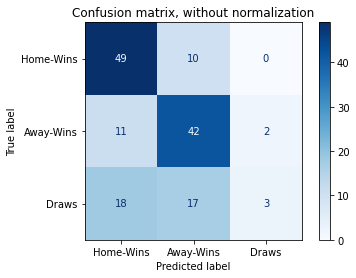

Normalized confusion matrix
[[0.83050847 0.16949153 0.        ]
 [0.2        0.76363636 0.03636364]
 [0.47368421 0.44736842 0.07894737]]


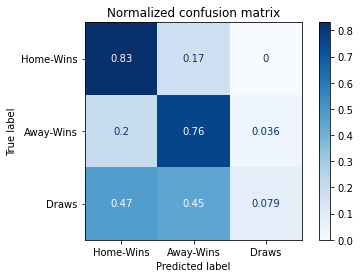

In [12]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

class_names=['Home-Wins', 'Away-Wins', 'Draws']


for title, normalize in titles_options:
    disp = plot_confusion_matrix(log_clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

    plt.show()

##### Precision, Recall, F1

In [13]:
p_r_f = precision_recall_fscore_support(y_test, results, average='macro')
p_r_f

(0.6123002601263471, 0.5576974022112292, 0.5107609019043082, None)

In [14]:
print(classification_report(y_test, results))

              precision    recall  f1-score   support

           0       0.63      0.83      0.72        59
           1       0.61      0.76      0.68        55
           2       0.60      0.08      0.14        38

    accuracy                           0.62       152
   macro avg       0.61      0.56      0.51       152
weighted avg       0.61      0.62      0.56       152



##### R-Squared & Adjusted R-Squared

In [15]:
r2 = r2_score(y_train[:len(results)], results[:len(results)])
print("R^2: " + str(r2))

R^2: -0.465607387791132


In [16]:
# n = number of sample size
# p = number of independent variables
#Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)

adjusted_r2 = 1 - ((1-r2) * (len(results) - 1) / (len(results) - len(df.columns.tolist()) - 1) )
print('Adjusted R^2: ' + str(adjusted_r2))

Adjusted R^2: -0.8597202987937893


##### FPR & TPR Rates

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, results, pos_label=2)

In [18]:
fpr

array([0.        , 0.01754386, 0.47368421, 1.        ])

In [19]:
tpr

array([0.        , 0.07894737, 0.52631579, 1.        ])

In [20]:
thresholds

array([3, 2, 1, 0], dtype=int64)

##### ROC Curve

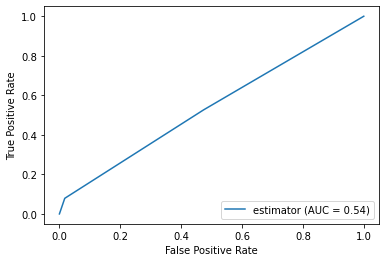

In [21]:
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,                                          
                            estimator_name='estimator')
display.plot()  
plt.show()

# Test With a Recent Game

Game Used: Man City vs Chelsea FA Cup (4/17/2021) -- Chelsea won (ie the Home Team won)

Data came from these links and our data

* https://www.espn.com/soccer/matchstats?gameId=597190
* https://www.si.com/soccer/manchestercity/match-coverage/manchester-city-vs-chelsea-where-to-watch-team-news-referees-everything-you-need-to-know

In [22]:
list(X.columns) # The values we need to make a prediction

['Season Encoding',
 'Time Encoding',
 'HomeTeam Encoding',
 'AwayTeam Encoding',
 'Referee Encoding',
 'Fouls Called Per Game',
 'HS',
 'AS',
 'HST',
 'AST',
 'HF',
 'AF',
 'HC',
 'AC',
 'HY',
 'AY',
 'HR',
 'AR']

In [23]:
# Data came from these links and our data

test_game = np.array([
    2, # 2 bc it took place in Spring
    0, # 0 bc kickoff was at 12:32 (rounds to 12:30)
    5, # Chelsea: 5 in the Team encoding
    14, # Man City: 14 in the Team encoding
    23, # Mike Dean was the referee
    14, # got from our data
    5, # HS
    11, # AS
    3, # HST
    3, # AST
    8, # HF
    12, # AF
    3, # HC 
    6, #AC
    2, # HY
    3, # AY
    0, # HR
    0, # AR
            ]).reshape(1, -1)

result = log_clf.predict(test_game)
print(result)

if result[0] == 0:
    print("Correct!",end=' ')
else:
    print("Incorrect!",end=' ')
    
print("Chelsea, the Home Team, won.")

[0]
Correct! Chelsea, the Home Team, won.


### Now Will Try It Using Averages (How it's designed to be used)

Note: Only used integer values, any decimal was cut off, there was no rounding (just floors the number). Eg, 16.75 would just be 16.

Data sources links:

* https://www.premierleague.com/stats/top/clubs/total_cross
* https://www.premierleague.com/clubs/4/Chelsea/stats?se=363
* https://www.premierleague.com/clubs/11/Manchester-City/stats?se=363

In [24]:
test_game_averages = np.array([
    2, # 2 bc it took place in Spring
    0, # 0 bc kickoff was at 12:32 (rounds to 12:30)
    5, # Chelsea: 5 in the Team encoding
    14, # Man City: 14 in the Team encoding
    23, # Mike Dean was the referee
    14, # got from our data
    14, # Chelsea Shots per game avg
    15, # Man City Shots per game avg 
    5, # Chelsea Shots on target per game avg
    5, # Man City Shots on target per game avg 
    6, # Chelsea Fouls per game avg
    5, # Man City Fouls per game avg 
    20, # Chelsea Crosses per game avg
    16, # Man City Crosses per game avg 
    1, # Chelsea Yellow Cards per game avg
    1, # Man City Yellow Cards per game avg 
    0, # Chelsea Red Cards per game avg
    0, # Man City Red Cards per game avg 
]).reshape(1, -1)

result = log_clf.predict(test_game_averages)
print(result)

if result[0] == 0:
    print("Correct!",end=' ')
else:
    print("Incorrect!",end=' ')
    
print("Chelsea, the Home Team, won.")

[0]
Correct! Chelsea, the Home Team, won.


# Saves the Model

In [25]:
filename = 'LogisticRegression_TimeData_Model.sav'

In [26]:
pickle.dump(log_clf, open(filename, 'wb'))